m=10,d=4
x0 = 1.2, x1  = 2.2685431987399665
x0 = 1.5, x1  = 9.347914647399493
x0 = 2, x1  = 45.16270443885449
m=10,d=5
x0 = 1.2, x1  = -2.1566603198576053
x0 = 1.5, x1  = -6.9225761587912515
x0 = 2, x1  = -36.74366832888941
m=10,d=6
x0 = 1.2, x1  = 9.389494303153327
x0 = 1.5, x1  = 83.57520182924748
x0 = 2, x1  = 781.0335845503579


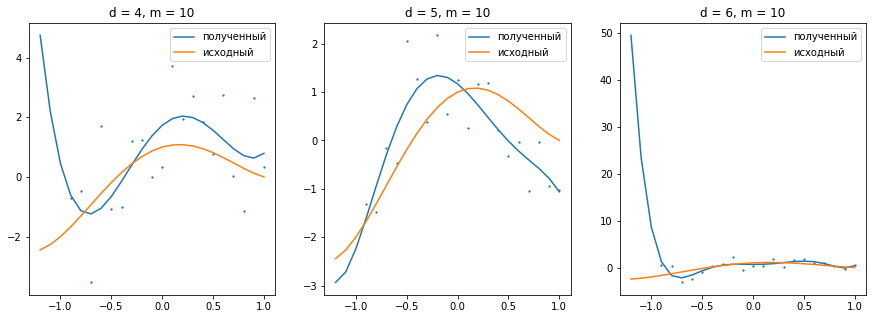

m=50,d=4
x0 = 1.2, x1  = 0.3672093914096761
x0 = 1.5, x1  = 2.718320119202658
x0 = 2, x1  = 15.31574282305889
m=50,d=5
x0 = 1.2, x1  = -2.9209549482039128
x0 = 1.5, x1  = -11.64543137480633
x0 = 2, x1  = -59.80567752459708
m=50,d=6
x0 = 1.2, x1  = 4.269661720418461
x0 = 1.5, x1  = 37.951720334960186
x0 = 2, x1  = 338.63339046305896


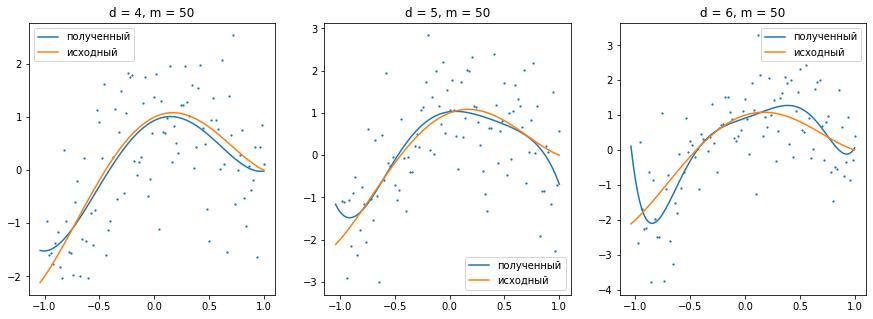

m=150,d=4
x0 = 1.2, x1  = -1.2100976502077891
x0 = 1.5, x1  = -2.5320003612191933
x0 = 2, x1  = -4.612407265942595
m=150,d=5
x0 = 1.2, x1  = 0.1507662220736874
x0 = 1.5, x1  = 0.0005456873696170206
x0 = 2, x1  = -1.7456659145845501
m=150,d=6
x0 = 1.2, x1  = -2.1781987389174526
x0 = 1.5, x1  = -5.335960201406309
x0 = 2, x1  = 5.649526202261667


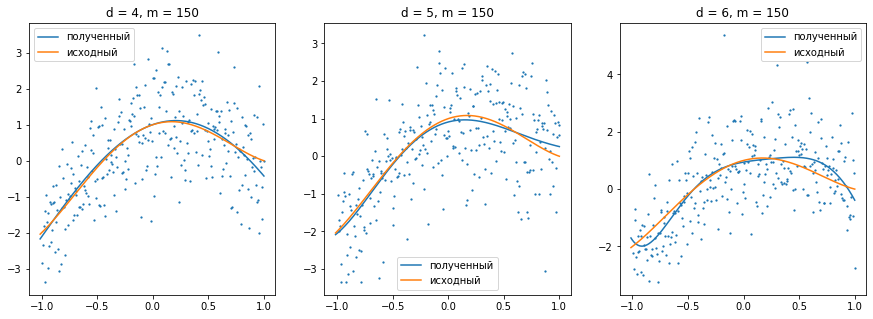

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sc
from sklearn.linear_model import LinearRegression

def f(z):
    return z**4-3*z**2+z+1

def expect(z, d):
    res = []
    for i in range(1, d+1):
        res.append(z**i)
    return res 
a = 3
b = 4
k = 4
d = [k, k+1, k+2]
M= [10, 50, 150]
xexp = [1.2, 1.5, 2]

for m in M:
    plt.figure(figsize = (15, 5))
    X=[]
    Y=[]
    F = np.arange(-1+1/m, 1+ 1/m, 1/(m))
    F1 = np.arange(-1-2/m,1+1/m, 1/(m))

    Y0= f(F1)

    for j in range(len(d)):
        for i in F:
            X.append(expect(i, d[j]))
            Y.append(f(i) + norm.rvs())
        
        model = LinearRegression()
        model.fit(X, Y)
        a1 = model.coef_
        b1 = model.intercept_

        Y1 = []
        for i in F1:
            res = 0
            for l in range(d[j]):
                res += a1[l]*i**(l+1) 
            Y1.append(res + b1)
        
        print("m="+ str(m)+",d="+ str(d[j]))
        for z in xexp:
            point = array_of_exp(z, d[j])
            value = model.predict(np.array([point]))
            print("x0 = " + str(z) + ", x1  = " + str(value[0]))
            
        plt.subplot(1, 3, j+1)
        plt.scatter(F, Y, s = 1.5)
        plt.plot(F1, Y1, F1, Y0)
        plt.legend(["полученный", "исходный"])
        plt.title("d = " + str(d[j]) + ", m = " + str(m))
        X = []
        Y = []
    plt.show()
